My Portfolio
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

In [2]:
loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2007, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'QQQ', 'TLT', 'GLD']

In [3]:
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import MaximumDiversificationOptimizer, MeanVarianceOptimizer, NoOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 3416/3416 [00:41<00:00, 81.73it/s]


                tickers  yearly total return  max draw down  \
0  [QQQ, TLT, SPY, GLD]             1.081401       0.452533   

   max draw down span  
0                1318  


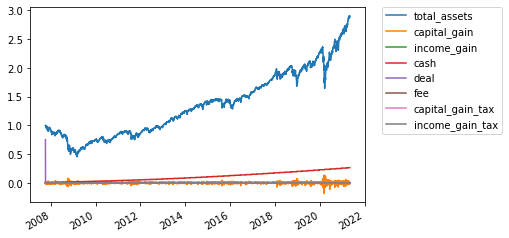

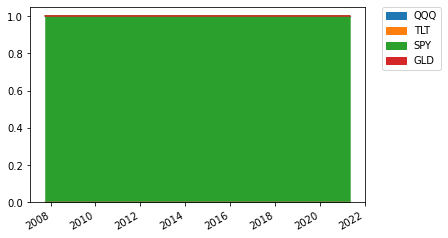

In [4]:
optimizer = NoOptimizer([1, 0, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


MaximumDiversificationOptimizer
----------------------------------------

100%|██████████| 3416/3416 [00:48<00:00, 71.15it/s]


                tickers  yearly total return  max draw down  \
0  [QQQ, TLT, SPY, GLD]             1.115576       0.496621   

   max draw down span  
0                 797  


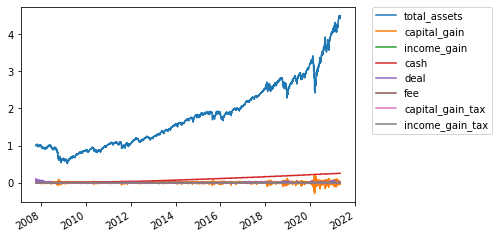

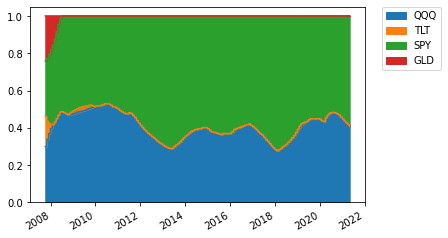

In [5]:
optimizer = MaximumDiversificationOptimizer(cost_tolerance=10, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


MeanVarianceOptimizer with cost tolerance
----------------------------------------------------

100%|██████████| 3416/3416 [00:51<00:00, 65.74it/s]


                tickers  yearly total return  max draw down  \
0  [QQQ, TLT, SPY, GLD]             1.090436       0.814318   

   max draw down span  
0                 482  


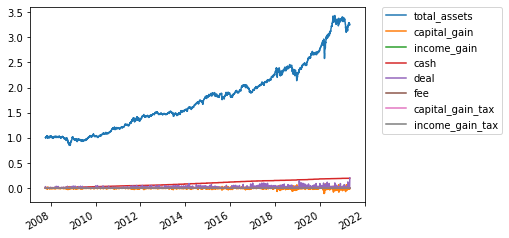

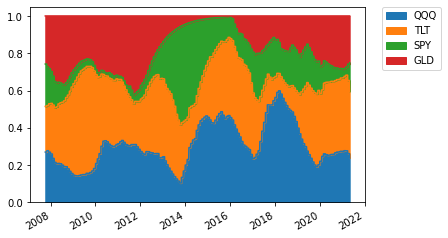

In [6]:
optimizer = MeanVarianceOptimizer(risk_tolerance=0.1, cost_tolerance=10, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
